In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
!pip install kaggle

In [ ]:
kaggle_auth = json.load(open("kaggle.json"))


In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_auth["username"]
os.environ['KAGGLE_KEY'] = kaggle_auth["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:25<00:00, 211MB/s]
100% 2.04G/2.04G [00:25<00:00, 87.0MB/s]


In [ ]:
!ls

drive  kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
os.listdir("plantvillage dataset")

['color', 'grayscale', 'segmented']

In [ ]:
os.listdir("plantvillage dataset/segmented")

['Soybean___healthy',
 'Squash___Powdery_mildew',
 'Tomato___Target_Spot',
 'Apple___Black_rot',
 'Strawberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Tomato___Late_blight',
 'Peach___Bacterial_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Potato___Late_blight',
 'Grape___Esca_(Black_Measles)',
 'Tomato___Early_blight',
 'Corn_(maize)___Common_rust_',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Strawberry___Leaf_scorch',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Leaf_Mold',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Raspberry___healthy',
 'Pepper,_bell___healthy',
 'Grape___healthy',
 'Apple___healthy',
 'Grape___Black_rot',
 'Pepper,_bell___Bacterial_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Potato___Early_blight',
 'Potato___healthy',
 'Apple___Apple_scab',
 'Tomato___Septoria_leaf_spot',
 'Blueberry___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Bacterial_spot',
 'Peac

In [ ]:
os.listdir("plantvillage dataset/color")

['Soybean___healthy',
 'Squash___Powdery_mildew',
 'Tomato___Target_Spot',
 'Apple___Black_rot',
 'Strawberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Tomato___Late_blight',
 'Peach___Bacterial_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Potato___Late_blight',
 'Grape___Esca_(Black_Measles)',
 'Tomato___Early_blight',
 'Corn_(maize)___Common_rust_',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Strawberry___Leaf_scorch',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Leaf_Mold',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Raspberry___healthy',
 'Pepper,_bell___healthy',
 'Grape___healthy',
 'Apple___healthy',
 'Grape___Black_rot',
 'Pepper,_bell___Bacterial_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Potato___Early_blight',
 'Potato___healthy',
 'Apple___Apple_scab',
 'Tomato___Septoria_leaf_spot',
 'Blueberry___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Bacterial_spot',
 'Peac

In [ ]:
len(os.listdir("plantvillage dataset/color"))

38

In [ ]:
len(os.listdir("plantvillage dataset/color/Apple___Cedar_apple_rust"))

275

In [ ]:
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


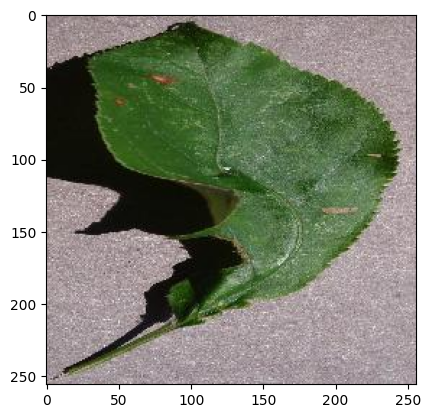

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
# plt.axis('off')  # Turn off axis numbers
plt.show()

array([[[154, 138, 141],
        [156, 140, 143],
        [152, 136, 139],
        ...,
        [173, 158, 161],
        [165, 150, 153],
        [167, 152, 155]],

       [[152, 136, 139],
        [158, 142, 145],
        [157, 141, 144],
        ...,
        [155, 140, 143],
        [155, 140, 143],
        [167, 152, 155]],

       [[147, 131, 134],
        [159, 143, 146],
        [159, 143, 146],
        ...,
        [148, 133, 136],
        [150, 135, 138],
        [164, 149, 152]],

       ...,

       [[ 83,  71,  73],
        [159, 147, 149],
        [185, 173, 175],
        ...,
        [153, 140, 147],
        [173, 160, 167],
        [171, 158, 165]],

       [[164, 152, 152],
        [186, 174, 174],
        [174, 162, 162],
        ...,
        [159, 146, 153],
        [157, 144, 151],
        [155, 142, 149]],

       [[148, 137, 135],
        [154, 143, 141],
        [143, 131, 131],
        ...,
        [193, 180, 187],
        [178, 165, 172],
        [164, 151, 158]]], dtype=uint8)
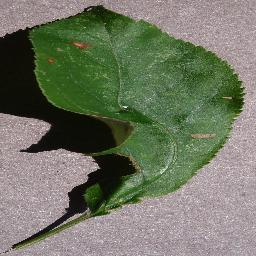

In [ ]:
mpimg.imread(image_path)


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)


In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [ ]:
with tf.device('/device:GPU:0'):  # Use the first GPU (index 0)
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size
    )


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 120s 88ms/step - accuracy: 0.8065 - loss: 0.6398 - val_accuracy: 0.8717 - val_loss: 0.4254
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 116s 84ms/step - accuracy: 0.9357 - loss: 0.1971 - val_accuracy: 0.8539 - val_loss: 0.5142
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0364
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 105s 77ms/step - accuracy: 0.9703 - loss: 0.0951 - val_accuracy: 0.8620 - val_loss: 0.5371


In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8630 - loss: 0.5311
Validation Accuracy: 86.20%


In [ ]:
#dump the model useing pickle save in drive
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
model.save('drive/MyDrive/Model_Training/plant_disease_prediction_model.h5')

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
json.dump(class_indices, open('class_indices.json', 'w'))


In [ ]:
# Example Usage
image_path = '/content/Apple-black-rot-figure-1-shows-apple-black-rot-while-preprocessing-an-infected-leaf.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class Name: Tomato___Septoria_leaf_spot


In [ ]:
from google.colab import drive
drive.mount('/content/drive')